<a href="https://colab.research.google.com/github/KESAVAPRABHA/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving real_estate_prices_dataset (1).csv to real_estate_prices_dataset (1).csv


In [ ]:
data=uploaded

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numerical_features = ['Bedrooms', 'Bathrooms', 'SquareFootage', 'YearBuilt', 'NearbySchools', 'CrimeRate', 'DistanceToCityCenter']
categorical_features = ['Location', 'HouseType', 'Garage', 'Garden', 'Basement']

data = data.drop(columns=['HouseID'])

data['Age'] = 2024 - data['YearBuilt']
data = data.drop(columns=['YearBuilt'])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features + ['Age']),
        ('cat', categorical_transformer, categorical_features)
    ])

Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Price'] < (Q1 - 1.5 * IQR)) | (data['Price'] > (Q3 + 1.5 * IQR)))]

X = data.drop(columns=['Price'])
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed.shape, X_test_preprocessed.shape, y_train.shape, y_test.shape


AttributeError: 'dict' object has no attribute 'drop'

In [ ]:
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

numerical_features = ['Bedrooms', 'Bathrooms', 'SquareFootage', 'NearbySchools', 'CrimeRate', 'DistanceToCityCenter']
categorical_features = ['Location', 'HouseType', 'Garage', 'Garden', 'Basement']

data = data.drop(columns=['HouseID'])

data['Age'] = 2024 - data['YearBuilt']
data = data.drop(columns=['YearBuilt'])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features + ['Age']),
        ('cat', categorical_transformer, categorical_features)
    ])

Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Price'] < (Q1 - 1.5 * IQR)) | (data['Price'] > (Q3 + 1.5 * IQR)))]

X = data.drop(columns=['Price'])
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

onehot_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + ['Age'] + list(onehot_feature_names)

X_train_processed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names, index=X_test.index)

print("Processed Training Data:")
print(X_train_processed_df.head())

print("\nProcessed Testing Data:")
print(X_test_processed_df.head())


Saving real_estate_prices_dataset (1).csv to real_estate_prices_dataset (1) (1).csv
Processed Training Data:
      Bedrooms  Bathrooms  SquareFootage  NearbySchools  CrimeRate  \
4227  1.386157   1.215848       1.550897       0.818844  -0.189901   
4676  1.386157  -1.249125       0.362102       1.168105  -1.599493   
800   1.386157   1.215848      -0.971289      -1.625987  -1.376724   
3671 -0.714346  -1.249125      -0.191169      -1.625987   1.085261   
4193 -0.014178  -0.016639       1.134429       0.818844   0.589791   

      DistanceToCityCenter       Age  Location_Rural  Location_Suburban  \
4227              0.952021 -0.228276             0.0                0.0   
4676              1.250612  0.102182             1.0                0.0   
800              -0.038563  0.291016             0.0                0.0   
3671              1.578920 -1.738943             0.0                1.0   
4193              0.279839  0.668683             0.0                0.0   

      Location_Urba

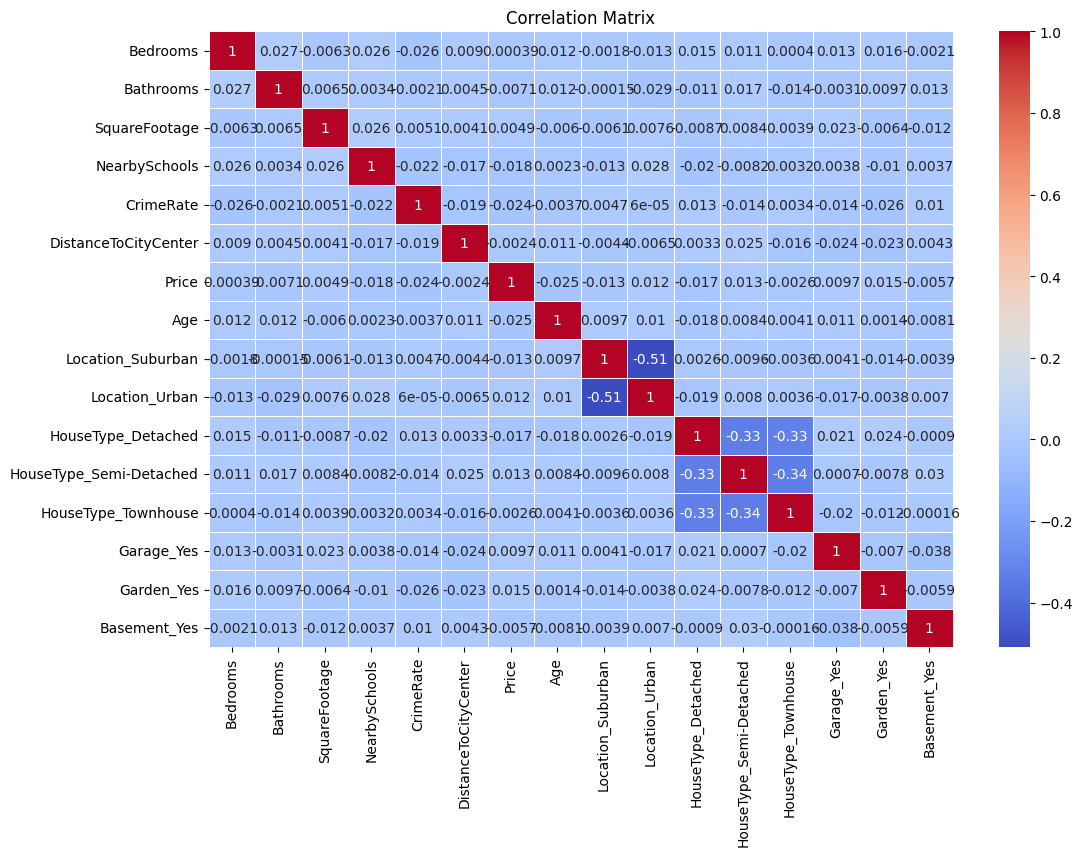

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_encoded = pd.get_dummies(data, columns=['Location', 'HouseType', 'Garage', 'Garden', 'Basement'], drop_first=True)

corr_matrix = data_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


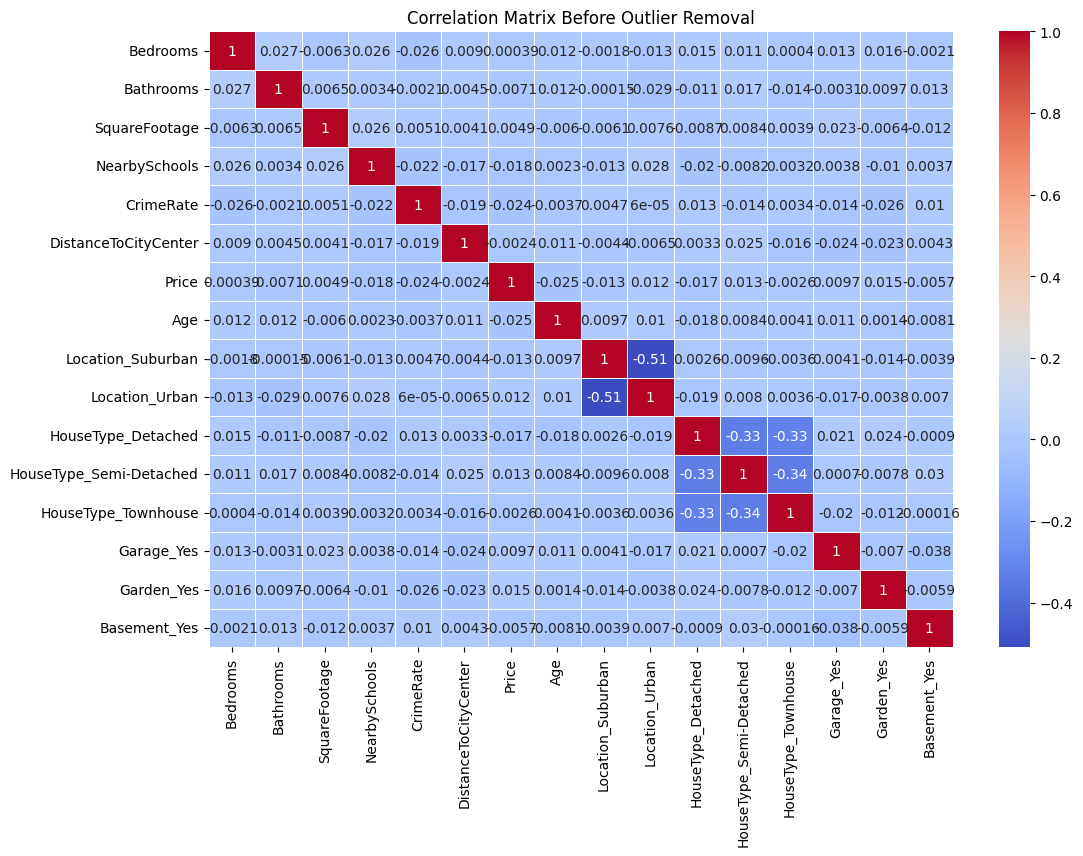

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# One-hot encode the categorical features in the original data before outlier removal
data_encoded_before_outliers = pd.get_dummies(data, columns=['Location', 'HouseType', 'Garage', 'Garden', 'Basement'], drop_first=True)

# Compute the correlation matrix on the encoded data before outlier removal
corr_matrix_before_outliers = data_encoded_before_outliers.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_before_outliers, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Before Outlier Removal')
plt.show()


In [ ]:

def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_cleaned

numerical_columns = ['SquareFootage', 'Price', 'Bedrooms', 'Bathrooms', 'NearbySchools', 'CrimeRate', 'DistanceToCityCenter']

data_cleaned = remove_outliers_iqr(data, numerical_columns)

data.shape, data_cleaned.shape



((5000, 13), (5000, 13))

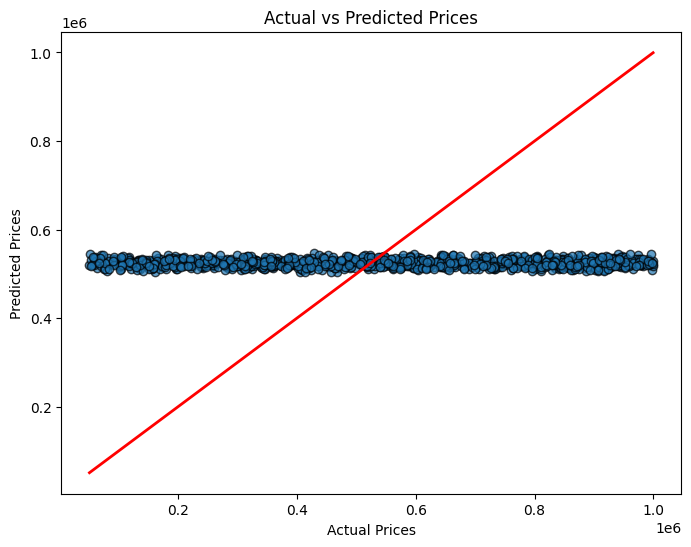

Mean Squared Error: 73638527974.77
R-squared: -0.00
                      Coefficient
SquareFootage            0.564699
Bedrooms              -940.817451
Bathrooms              702.378708
NearbySchools        -1698.636707
CrimeRate            -2787.363696
DistanceToCityCenter   115.538014


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = data_cleaned[['SquareFootage', 'Bedrooms', 'Bathrooms', 'NearbySchools', 'CrimeRate', 'DistanceToCityCenter']]
y = data_cleaned['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R-squared: {r2_score(y_test, y_pred):.2f}')

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


In [ ]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R-squared: {r2_score(y_test, y_pred):.2f}')

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 73638527974.77
R-squared: -0.00
                      Coefficient
SquareFootage            0.564699
Bedrooms              -940.817451
Bathrooms              702.378708
NearbySchools        -1698.636707
CrimeRate            -2787.363696
DistanceToCityCenter   115.538014


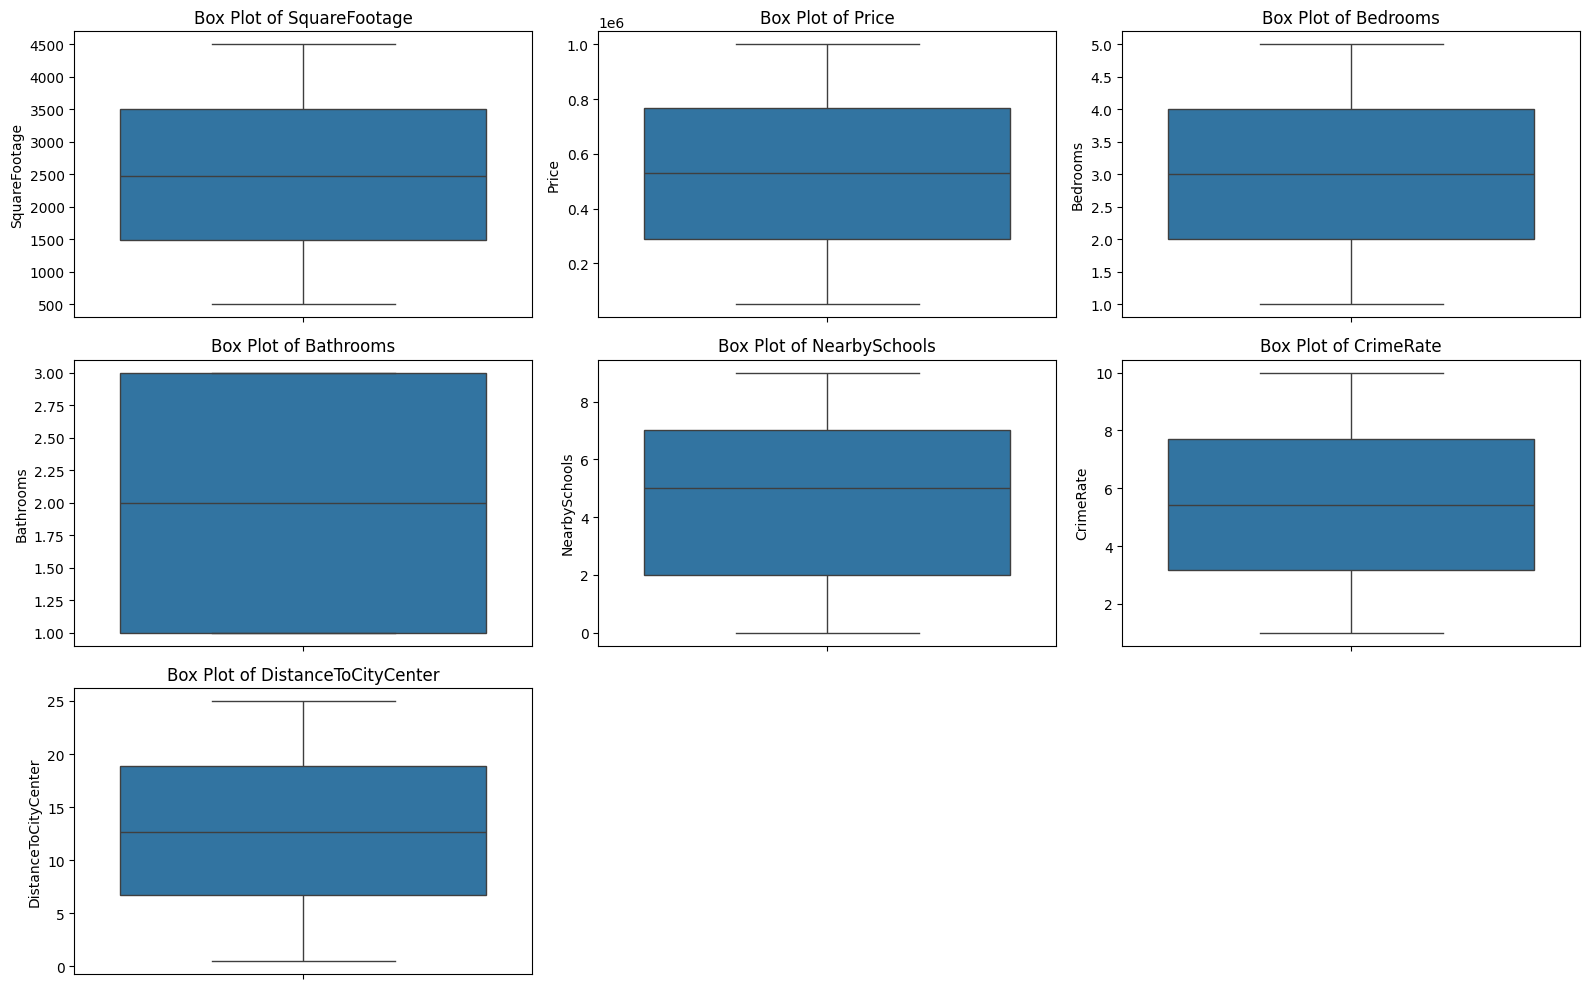

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['SquareFootage', 'Price', 'Bedrooms', 'Bathrooms', 'NearbySchools', 'CrimeRate', 'DistanceToCityCenter']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data_cleaned[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


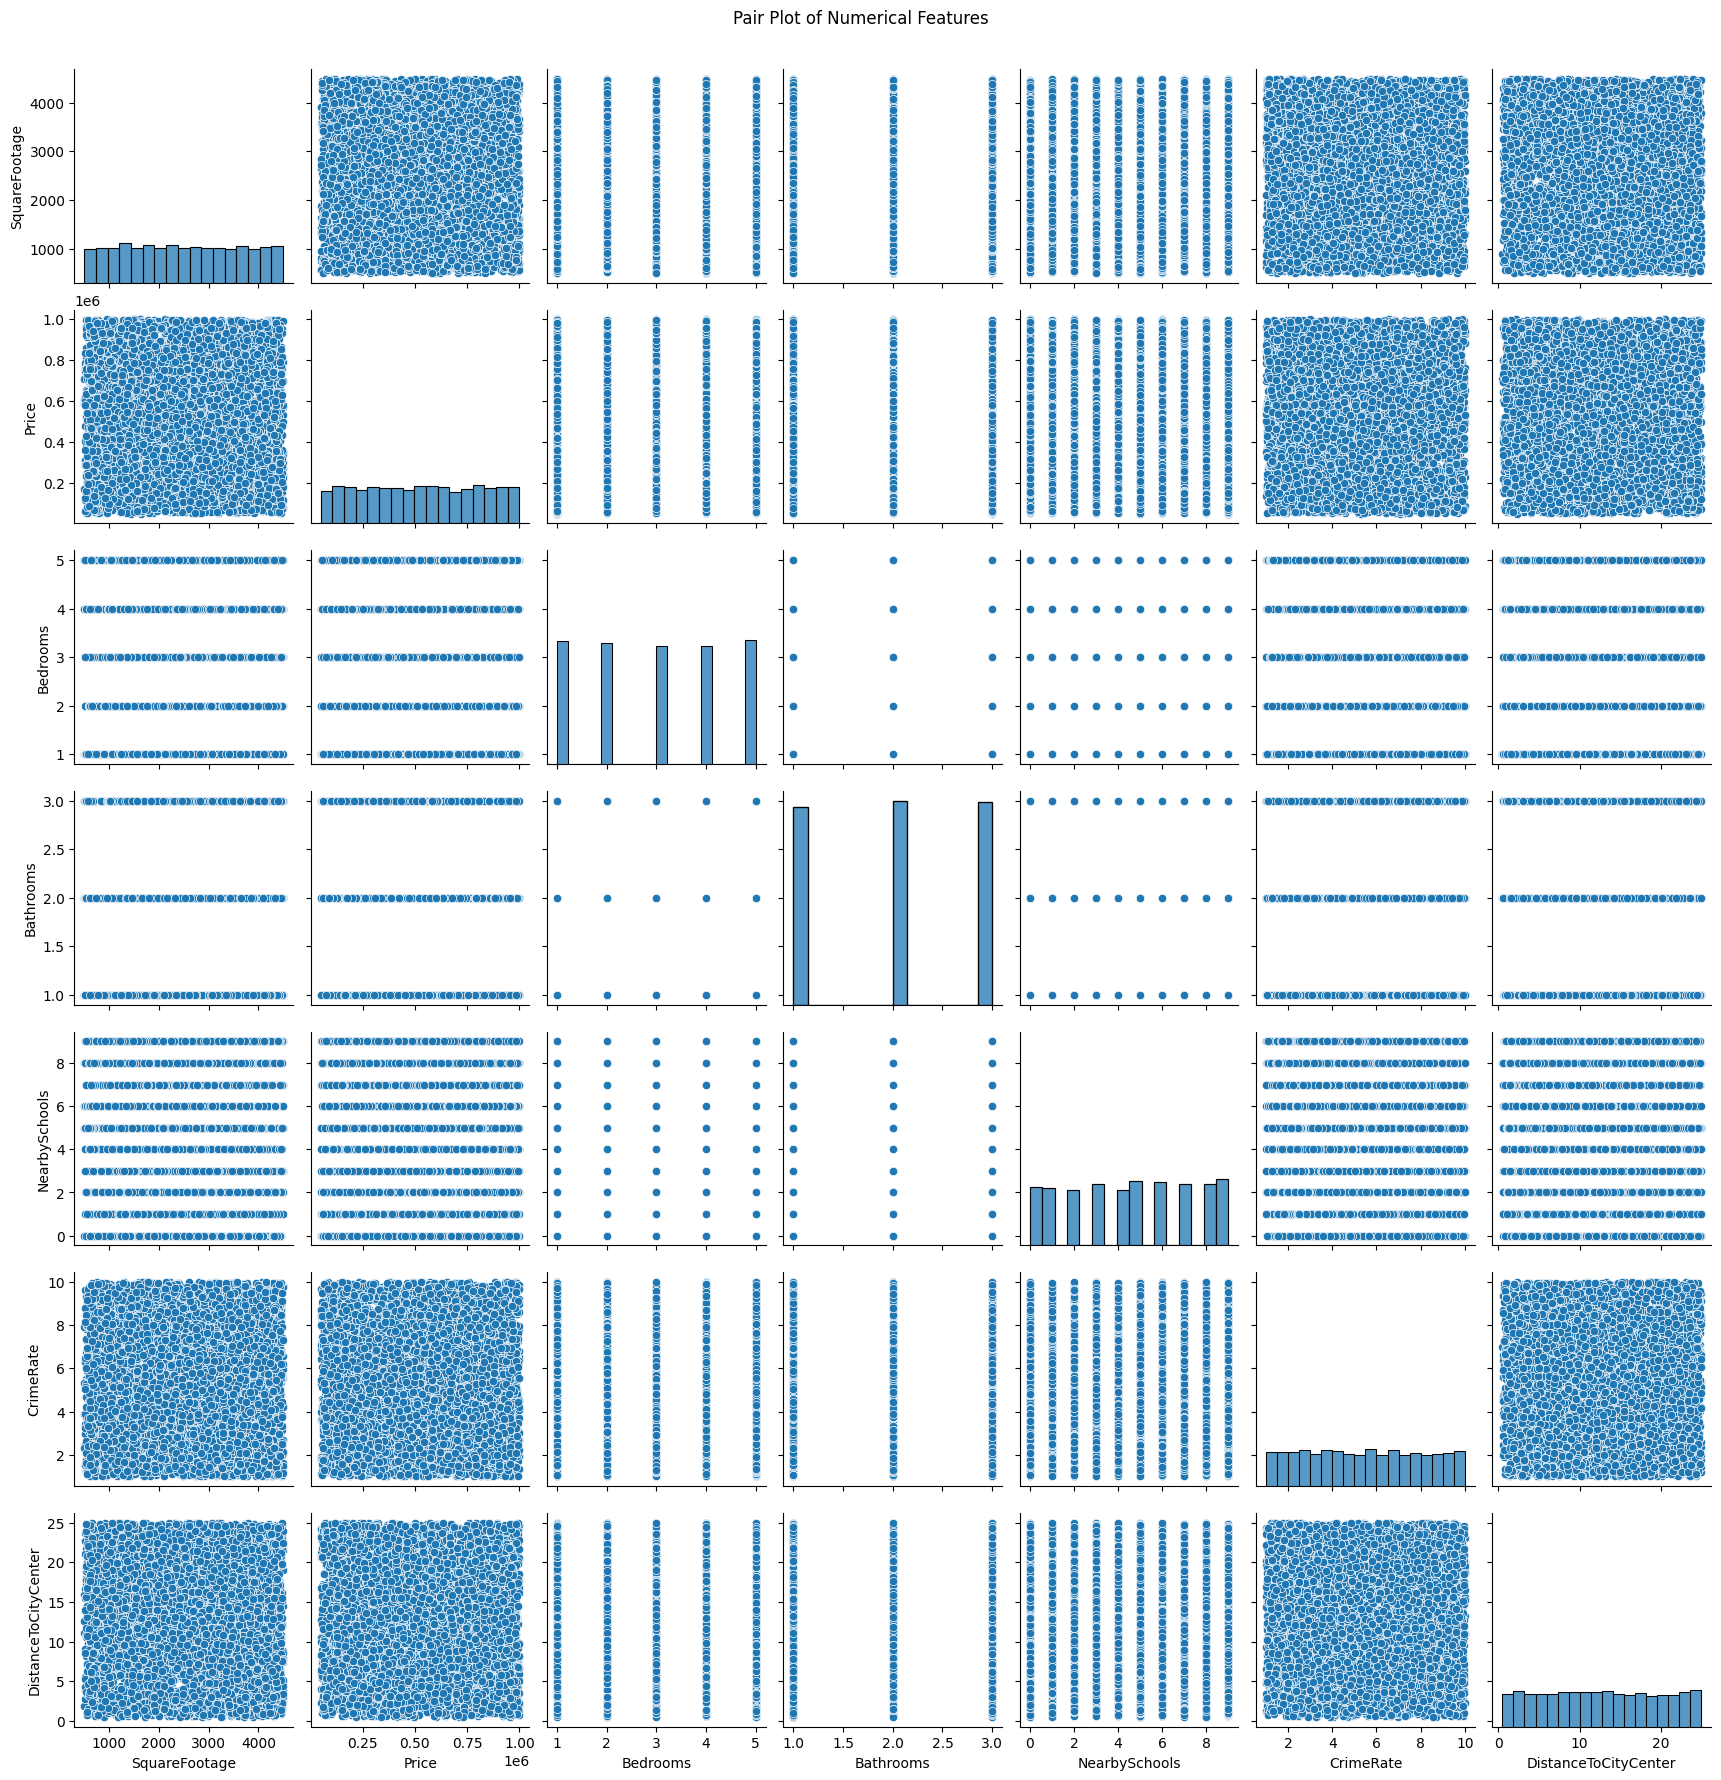

In [ ]:

sns.pairplot(data_cleaned[numerical_columns])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


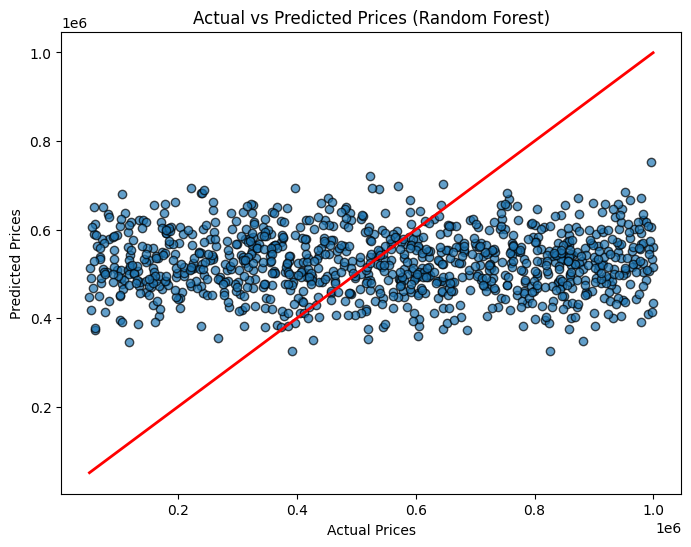

Mean Squared Error: 78400816916.70
R-squared: -0.07


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = data_cleaned[['SquareFootage', 'Bedrooms', 'Bathrooms', 'NearbySchools', 'CrimeRate', 'DistanceToCityCenter']]
y = data_cleaned['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Perfect prediction line
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R-squared: {r2_score(y_test, y_pred):.2f}')
